In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
dataFrame = pd.read_excel("maliciousornot.xlsx") 

In [57]:
dataFrame

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,...,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,...,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,...,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,...,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [58]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [40]:
dataFrame.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [60]:
dataFrame.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

<Axes: xlabel='Type', ylabel='count'>

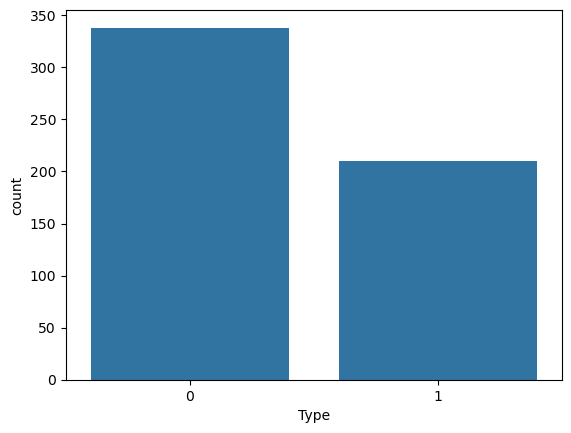

In [61]:
sbn.countplot(x = "Type", data= dataFrame)

<Axes: >

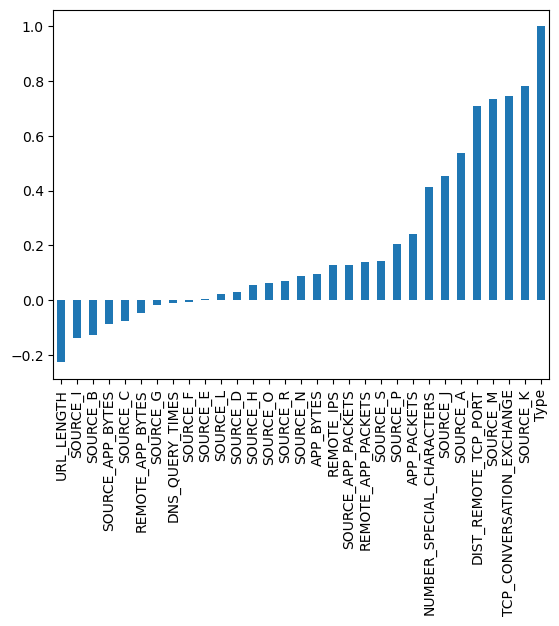

In [62]:
dataFrame.corr()["Type"].sort_values().plot(kind = "bar")

In [63]:
y = dataFrame["Type"].values
x = dataFrame.drop("Type", axis = 1).values

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=15) 

In [65]:
scaler = MinMaxScaler()

In [66]:
scaler.fit(x_train)

MinMaxScaler()

In [68]:
x_train = scaler.transform(x_train)

In [70]:
x_test = scaler.transform(x_test)

In [71]:
x_train.shape

(383, 30)

In [72]:
model = Sequential()

model.add(Dense(units = 30, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")

>**overfitting**

In [73]:
model.fit(x=x_train, y=y_train, epochs = 700, validation_data=(x_test, y_test),verbose= 1)


Epoch 1/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6803 - val_loss: 0.7238
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6417 - val_loss: 0.6979
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6621 - val_loss: 0.7013
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6449 - val_loss: 0.7207
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6674 - val_loss: 0.7119
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6392 - val_loss: 0.7168
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6625 - val_loss: 0.7078
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6342 - val_loss: 0.7135
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6673 - val_loss: 0.7056
Epoch 10/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6573 - val_loss: 0.7150
Epoch 11/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6640 - val_loss: 0.7106
Epoch 12/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6

In [74]:
model.history.history

{'loss': [0.6671118140220642,
  0.6493475437164307,
  0.6500052809715271,
  0.6484429836273193,
  0.6480088233947754,
  0.6474345922470093,
  0.6472122669219971,
  0.6468086242675781,
  0.6474241614341736,
  0.6458338499069214,
  0.6467763781547546,
  0.6470510363578796,
  0.6457459926605225,
  0.645359992980957,
  0.6446453332901001,
  0.6440244317054749,
  0.6433735489845276,
  0.6437487602233887,
  0.6435402035713196,
  0.6430552005767822,
  0.6428310871124268,
  0.6420008540153503,
  0.6421735286712646,
  0.6438021659851074,
  0.6420329809188843,
  0.6426198482513428,
  0.642530083656311,
  0.6413467526435852,
  0.6407989263534546,
  0.6409564018249512,
  0.6423830389976501,
  0.6414169073104858,
  0.6411561965942383,
  0.6404891610145569,
  0.6407585740089417,
  0.640312135219574,
  0.6400435566902161,
  0.6392462849617004,
  0.6408267617225647,
  0.6396240592002869,
  0.6396579146385193,
  0.6389857530593872,
  0.6411392092704773,
  0.6391456127166748,
  0.6386162042617798,
  0.6

In [77]:
modelKaybi = pd.DataFrame(model.history.history)

<Axes: >

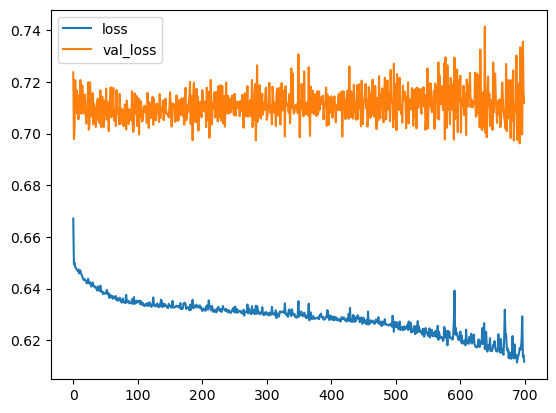

In [78]:
modelKaybi.plot()

>**Early Stopping**

In [79]:
model = Sequential()

model.add(Dense(units = 30, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [81]:
earlyStopping = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)


In [82]:
model.fit(x=x_train, y=y_train, epochs = 700, validation_data = (x_test,y_test), verbose = 1, callbacks=[earlyStopping])


Epoch 1/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6794 - val_loss: 0.6888
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6602 - val_loss: 0.7199
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6655 - val_loss: 0.7194
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6583 - val_loss: 0.7147
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6359 - val_loss: 0.7119
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6399 - val_loss: 0.7093
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6519 - val_loss: 0.7077
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6667 - val_loss: 0.7097
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6404 - val_loss: 0.7160
Epoch 10/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6538 - val_loss: 0.7075
Epoch 11/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6487 - val_loss: 0.7095
Epoch 12/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6

In [84]:
modelKaybi = pd.DataFrame(model.history.history)

<Axes: >

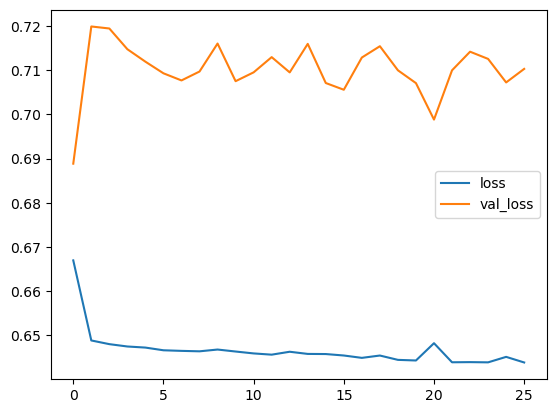

In [85]:
modelKaybi.plot()

>**Dropout**

In [86]:
model = Sequential()

model.add(Dense(units=30,activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15,activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15,activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(units=1,activation = "sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam")

In [87]:
model.fit(x=x_train, y=y_train, epochs = 700, validation_data = (x_test,y_test), verbose = 1, callbacks=[earlyStopping])


Epoch 1/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2948 - val_loss: 0.8506
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2551 - val_loss: 0.7640
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2952 - val_loss: 0.7141
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9876 - val_loss: 0.7010
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7957 - val_loss: 0.6949
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9351 - val_loss: 0.6904
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8997 - val_loss: 0.6896
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7815 - val_loss: 0.6882
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8200 - val_loss: 0.6875
Epoch 10/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7734 - val_loss: 0.6867
Epoch 11/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7528 - val_loss: 0.6865
Epoch 12/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7

In [88]:
kayipDf = pd.DataFrame(model.history.history)

<Axes: >

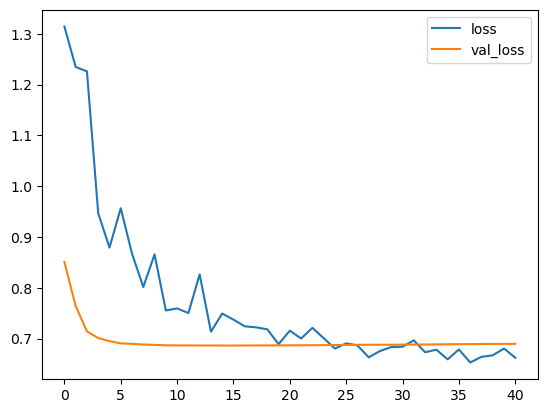

In [89]:
kayipDf.plot()

In [101]:
tahminler = model.predict(x_test)
tahmin_siniflari = np.argmax(tahminler, axis=1).reshape(-1, 1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [102]:
tahmin_siniflari

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [104]:
print(classification_report(y_test,tahmin_siniflari))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        91
           1       0.00      0.00      0.00        74

    accuracy                           0.55       165
   macro avg       0.28      0.50      0.36       165
weighted avg       0.30      0.55      0.39       165



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
